### Assignment for Research and Development / AI

In [7]:
#  import all the libraries

import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [9]:
# Uploaded and check the dataset

df = pd.read_csv("/content/xy_data.csv")
x_data = df['x'].values
y_data = df['y'].values
df.head()

,x,y
0,88.364456,57.784378
1,74.283936,54.406780
2,60.256474,46.311462
3,82.134370,57.717567
4,101.036390,67.849340


In [10]:
# Writing the Eqution for finding the Unknown

def model(params, t):
    theta, M, X = params
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y

t_grid = np.linspace(6, 60, 2000)

def total_distance(params):
    x_curve, y_curve = model(params, t_grid)
    total = 0
    for xi, yi in zip(x_data, y_data):
        d = np.abs(x_curve - xi) + np.abs(y_curve - yi)
        total += np.min(d)
    return total

# Boundary
deg_to_rad = np.pi / 180
bounds = [
    (0 * deg_to_rad, 50 * deg_to_rad),
    (-0.05, 0.05),
    (0, 100)
]

# Optimization
result = differential_evolution(total_distance, bounds, maxiter=100)
theta, M, X = result.x


In [11]:
# Unknown

print(f"Theta = {theta/deg_to_rad:.3f} degrees")
print(f"M = {M:.5f}")
print(f"X = {X:.3f}")
print("Total distance =", result.fun)


Theta = 30.000 degrees
M = 0.03000
X = 55.000
Total distance = 15.061303842084648


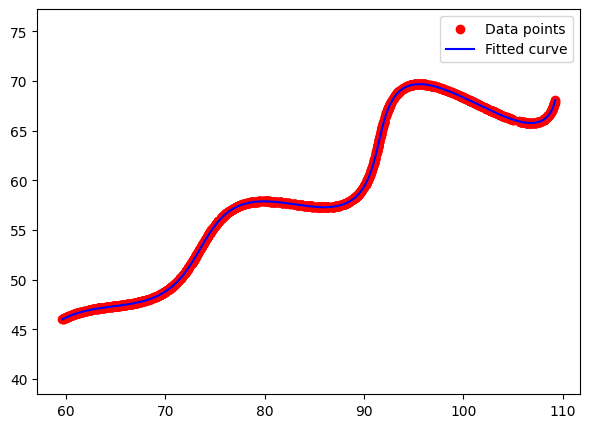

In [13]:
# Plot the Graph
x_curve, y_curve = model(result.x, t_grid)
plt.figure(figsize=(7,5))
plt.scatter(x_data, y_data, color='red', label='Data points')
plt.plot(x_curve, y_curve, color='blue', label='Fitted curve')
plt.legend()
plt.axis('equal')
plt.show()